# Clients churn

## Introduction

Customers began to leave "Beta-Bank". Every month. A little, but noticeable. Bank marketers have found that it is cheaper to retain current customers than to attract new ones.

It is necessary to predict whether the client will leave the bank in the near future or not. There is historical data on the behavior of customers and the termination of contracts with the bank.

**Project objective**

To predict the client's churn.

**Data description**

The data is taken from Churn.csv file.

Dependent variables:
* `RowNumber` — row index
* `CustomerID` — the unique identifier of the customer
* `Surname` — last name
* `CreditScore` — credit rating
* `Geography` — country of residence
* `Gender` — gender
* `Age` — age
* `Tenure` — how many years a person has been a customer of the bank
* `Balance` — account balance
* `NumOfProducts` — the number of bank products used by the customer
* `HasCrCard` — availability of a credit card
* `IsActiveMember` — client activity
* `EstimatedSalary` — estimated salary

Target variable:
* `Exited` — the fact of the client's departure

<h3>Table of content<span class="tocSkip"></span></h3>

<div class="toc"><ul class="toc-item">
    <span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-1">
            <span class="toc-item-num">1&nbsp;&nbsp;
            </span>Data preparation</a></span></li>
    <li><span><a href="#Task-research" data-toc-modified-id="Task-research-2">
        <span class="toc-item-num">2&nbsp;&nbsp;
        </span>Task research</a></span>
        <ul class="toc-item">
            <span><a href="#Data-balance-check" data-toc-modified-id="Data-balance-check-2.1">
        <span class="toc-item-num">2.1&nbsp;&nbsp;
        </span>Data balance check</a></span></li>
        <li><span><a href="#Model-research-before-data-balancing" data-toc-modified-id="Model-research-before-data-balancing-2.2">
    <span class="toc-item-num">2.2&nbsp;&nbsp;
    </span>Model research before data balancing</a></span>
            <ul class="toc-item">
                <li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-2.2.1">
        <span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Logistic regression</a></span></li>
    <li><span><a href="#Decision-tree" data-toc-modified-id="Decision-tree-2.2.2">
        <span class="toc-item-num">2.2.2&nbsp;&nbsp;
        </span>Decision tree</a></span></li><li>
    <span><a href="#Random-forest" data-toc-modified-id="Random-forest-2.2.3">
        <span class="toc-item-num">2.2.3&nbsp;&nbsp;
        </span>Random forest</a></span></li>
            </ul>
   <li><span><a href="#Fighting-the-imbalance" data-toc-modified-id="Fighting-the-imbalance-3">
        <span class="toc-item-num">3&nbsp;&nbsp;
        </span>Fighting the imbalance</a></span>
             <ul class="toc-item">
        <li><span><a href="#Upsampling-method" data-toc-modified-id="Upsampling-method-3.1">
        <span class="toc-item-num">3.1&nbsp;&nbsp;
        </span>Upsampling method</a></span></li><li>
    <span><a href="#Downsampling-method" data-toc-modified-id="Downsampling-method-3.2">
        <span class="toc-item-num">3.2&nbsp;&nbsp;
        </span>Downsampling method</a></span></li><li>
    <span><a href="#SMOTE" data-toc-modified-id="SMOTE-3.3">
        <span class="toc-item-num">3.3&nbsp;&nbsp;</span>SMOTE</a></span></li>
                </ul>
            </li><li><span><a href="#Testing-the-model" data-toc-modified-id="Testing-the-model-4">
        <span class="toc-item-num">4&nbsp;&nbsp;
        </span>Testing the model</a></span>
            <ul class="toc-item">
                <li><span><a href="#Decision-tree" data-toc-modified-id="Decision-tree-4.1">
        <span class="toc-item-num">4.1&nbsp;&nbsp;
        </span>Decision tree</a></span></li><li>
    <span><a href="#Random-forest" data-toc-modified-id="Random-forest-4.2">
        <span class="toc-item-num">4.2&nbsp;&nbsp;
        </span>Random forest</a></span></li><li>
    <span><a href="#Extra" data-toc-modified-id="Extra-4.3">
        <span class="toc-item-num">4.3&nbsp;&nbsp;
        </span>Extra</a></span>

## Data preparation

Import all necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from collections import Counter
from sklearn.utils import shuffle

In [ ]:
#pip install -U scikit-learn

In [ ]:
#pip install imbalanced-learn

In [2]:
pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 9.8 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# !pip3 install imblearn

In [ ]:
#pip install imblearn

In [3]:
from imblearn.over_sampling import SMOTE

In [4]:
data = pd.read_csv('/Users/aasheremeeva/Desktop/All DS Projects/clients churn/Churn.csv')

Analysis of the original data.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Variables do we not need:
- `Row Number`
- `CustomerId`
- `Surname`

These variables will be removed from the dataset for further analysis, they will not affect the results.

Categorical variables (OHE):
- `Gender` (categorical/nominal variables)
- `Geography` (categorical/nominal variables)

Standardization is needed for:
- `CreditScore`
- `Age`
- `Tenure`
- `Balance`

In [7]:
data.drop(columns=data.columns[0:3], axis= 1 , inplace= True)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


Checking the data for missing values.

In [8]:
data.isna().sum()

CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [9]:
print(data['Tenure'].median())
print(data['Tenure'].mean())

5.0
4.997690023099769


Filling in the missing values of the `Tenure` variable with the median.

In [10]:
data['Tenure'] = data['Tenure'].fillna(data['Tenure'].median())
data.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Preliminary division of data into training, test and validation samples.

In [11]:
y = data['Exited']
X = data.drop('Exited', axis=1)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,  test_size=0.2, random_state= 42)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(6400, 10)
(2000, 10)
(6400,)
(2000,)
(6400, 10)
(1600, 10)
(6400,)
(1600,)


Variables standartization:

In [14]:
numeric=['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts','EstimatedSalary']
scaler = StandardScaler()
scaler.fit(X_train[numeric])

X_train[numeric]=scaler.transform(X_train[numeric])
X_train_scaled = pd.DataFrame(X_train[numeric], columns = numeric, index = X_train.index)

X_test[numeric]=scaler.transform(X_test[numeric])
X_test_scaled = pd.DataFrame(X_test[numeric], columns = numeric, index = X_test.index)

X_valid[numeric]=scaler.transform(X_valid[numeric])
X_valid_scaled = pd.DataFrame(X_valid[numeric], columns = numeric, index = X_valid.index)

In [15]:
cats=['Geography','Gender']
ohs = OneHotEncoder(handle_unknown='ignore', drop='first')
X_train_ohs = pd.DataFrame(ohs.fit_transform(X_train[['Geography','Gender']]).toarray(),columns = ohs.get_feature_names_out())
X_test_ohs = pd.DataFrame(ohs.transform(X_test[['Geography','Gender']]).toarray(),columns = ohs.get_feature_names_out())
X_valid_ohs = pd.DataFrame(ohs.transform(X_valid[['Geography','Gender']]).toarray(),columns = ohs.get_feature_names_out())

Merging all the data.

In [16]:
X_train_final = pd.concat([X_train_scaled.reset_index(), X_train_ohs.reset_index()], axis = 1)
X_test_final = pd.concat([X_test_scaled.reset_index(), X_test_ohs.reset_index()], axis = 1)
X_valid_final = pd.concat([X_valid_scaled.reset_index(), X_valid_ohs.reset_index()], axis = 1)

In [17]:
X_train_final.isna().sum()
X_train_final['Tenure'] = X_train_final['Tenure'].fillna(X_train_final['Tenure'].median())
X_test_final['Tenure'] = X_test_final['Tenure'].fillna(X_test_final['Tenure'].median())
X_valid_final['Tenure'] = X_valid_final['Tenure'].fillna(X_valid_final['Tenure'].median())

In [18]:
X_train_final.isna().sum()
X_test_final.isna().sum()
X_valid_final.isna().sum()

index                0
CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
EstimatedSalary      0
index                0
Geography_Germany    0
Geography_Spain      0
Gender_Male          0
dtype: int64

## Task research

### Data balance check

In [19]:
y_train.value_counts()

0    5083
1    1317
Name: Exited, dtype: int64

The variable shows a strong "skew", a clear imbalance is obvious.

### Model research before data balancing

Since the goal is to predict whether the client will leave the bank in the near future or not, in fact, it is most important to calculate those who will leave ("Exited"=1) in the most accurate way. In this case, the focus will be on maximization of precision metric, but at the same time the F1 metric.

#### Logistic regression

In [20]:
model_l = LogisticRegression()
model_l.fit(X_train_final, y_train)
predict_valid_log = model_l.predict(X_valid_final)


probabilities_log = model_l.predict_proba(X_valid_final)
probs_log = probabilities_log[:, 1]

roc_auc_log = roc_auc_score(y_valid, probs_log)

print("Recall:",recall_score(y_valid,predict_valid_log))
print("Precision:", precision_score(y_valid,predict_valid_log))
print('F1:', f1_score(y_valid,predict_valid_log))
print('ROC_AUC:', roc_auc_log)

Recall: 0.14678899082568808
Precision: 0.4444444444444444
F1: 0.22068965517241382
ROC_AUC: 0.756540811154272


#### Decision tree

In [21]:
model_d = DecisionTreeClassifier(random_state=12345)
model_d.fit(X_train_final, y_train)
predict_valid_d = model_d.predict(X_valid_final)

probabilities_d = model_d.predict_proba(X_valid_final)
probs_d = probabilities_d[:, 1]

roc_auc_d = roc_auc_score(y_valid, probs_d)

print("Recall:", recall_score(y_valid, predict_valid_d))
print("Precision:", precision_score(y_valid, predict_valid_d))
print('F1:', f1_score(y_valid, predict_valid_d))
print('ROC_AUC:', roc_auc_d)

Recall: 0.4617737003058104
Precision: 0.4206128133704735
F1: 0.4402332361516035
ROC_AUC: 0.6491900708913184


#### Random forest

In [22]:
best_model_f = None
best_result_f = 0.0
for est in range(10, 500, 10):
    model_forest = RandomForestClassifier(random_state=12345, n_estimators=est)
    model_forest.fit(X_train_final, y_train)
    result_forest = model_forest.score(X_valid_final, y_valid)
    if result_forest > best_result_f:
        best_result_f = result_forest
        best_model_f = model_forest

print("Accuracy (best model)on the valid sample:", best_result_f)
print(best_model_f)

Accuracy (best model)on the valid sample: 0.8525
RandomForestClassifier(n_estimators=440, random_state=12345)


In [23]:
model_rf = RandomForestClassifier(random_state=12345, n_estimators = 440)
model_rf.fit(X_train_final, y_train)
predict_valid_rf = model_rf.predict(X_valid_final)

probabilities_rf = model_rf.predict_proba(X_valid_final)
probs_rf = probabilities_rf[:, 1]

roc_auc_rf = roc_auc_score(y_valid, probs_rf)

print("Recall:",recall_score(y_valid, predict_valid_rf))
print("Precision:", precision_score(y_valid, predict_valid_rf))
print('F1:', f1_score(y_valid, predict_valid_rf))
print('ROC_AUC:', roc_auc_rf)

Recall: 0.42201834862385323
Precision: 0.745945945945946
F1: 0.5390625
ROC_AUC: 0.8433460414009143


On unbalanced data, the best results in terms of accuracy and F1 are demonstrated by the random forest model. But it will need to be rechecked later on the data after balancing.

## Fighting the imbalance

###  Upsampling method

Testing the Upsampling method for data balancing. Upsampling consists in manually adding data to the "minority" class.

In [24]:
def upsample(features, target, repeat):
    features_zeros = features[target.values == 0]
    features_ones = features[target.values == 1]
    target_zeros = target[target.values == 0]
    target_ones = target[target.values == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones]* repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones]* repeat)

    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)

    return features_upsampled, target_upsampled

X_train_final_up, y_train_up = upsample(X_train_final, y_train, 10)

In [25]:
print(X_train_final_up.shape)
print(y_train_up.shape)

(18253, 11)
(18253,)


### Downsampling method

In [26]:
def downsample(features, target, fraction):
    features_zeros = features[target.values == 0]
    features_ones = features[target.values == 1]
    target_zeros = target[target.values == 0]
    target_ones = target[target.values == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=42)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=42)] + [target_ones])

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=42)

    return features_downsampled, target_downsampled

X_train_final_down, y_train_down = downsample(X_train_final, y_train, 0.1)

In [27]:
print(X_train_final_down.shape)
print(y_train_down.shape)

(1825, 11)
(1825,)


### SMOTE

Performing data balancing using the SMOTE method, since SMOTE controls how much we "reassign" the "minority" class.

In [28]:
#data before balancing
print("Before OverSampling, counts of label '1': {}".format(sum(y_train.values == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train.values == 0)))

Before OverSampling, counts of label '1': 1317
Before OverSampling, counts of label '0': 5083 



In [29]:
SMOTE = SMOTE(random_state=42)
X_train_final_s=np.array(X_train_final)
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train_final_s, y_train)

In [30]:
#data after balancing
print("After OverSampling, counts of label '1': {}".format(sum(y_train_SMOTE.values == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_SMOTE.values == 0)))

After OverSampling, counts of label '1': 5083
After OverSampling, counts of label '0': 5083


Balancing was successful. Next: training models on balanced data and testing on a test sample.

## Testing the model

The logistic model showed too poor result at the research stage. Next, we will leave the decision tree and random forest models to check on the test sample.

### Decision tree

In [31]:
model_d = DecisionTreeClassifier(random_state=12345)
model_d.fit(X_train_SMOTE, y_train_SMOTE)
predict_test_d = model_d.predict(X_test_final)

print("Recall before SMOTE:", recall_score(y_valid, predict_valid_d))
print("Recall after SMOTE:", recall_score(y_test, predict_test_d))
print()
print("Precision before SMOTE:", precision_score(y_valid, predict_valid_d))
print("Precision after SMOTE:", precision_score(y_test, predict_test_d))
print()
print('F1 before SMOTE:', f1_score(y_valid, predict_valid_d))
print('F1 after SMOTE:', f1_score(y_test, predict_test_d))

Recall before SMOTE: 0.4617737003058104
Recall after SMOTE: 0.5038167938931297

Precision before SMOTE: 0.4206128133704735
Precision after SMOTE: 0.42217484008528783

F1 before SMOTE: 0.4402332361516035
F1 after SMOTE: 0.4593967517401392


/Users/aasheremeeva/anaconda3/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


### Random forest

In [32]:
model_rf = RandomForestClassifier(random_state=12345, n_estimators = 440)
model_rf.fit(X_train_SMOTE, y_train_SMOTE)
predict_test_rf = model_rf.predict(X_test_final)

print("Recall before SMOTE:", recall_score(y_valid, predict_valid_rf))
print("Recall after SMOTE:", recall_score(y_test, predict_test_rf))
print()
print("Precision before SMOTE:", precision_score(y_valid, predict_valid_rf))
print("Precision after SMOTE:", precision_score(y_test, predict_test_rf))
print()
print('F1 before SMOTE:', f1_score(y_valid, predict_valid_d))
print('F1 after SMOTE:', f1_score(y_valid, predict_valid_rf))

Recall before SMOTE: 0.42201834862385323
Recall after SMOTE: 0.5089058524173028

Precision before SMOTE: 0.745945945945946
Precision after SMOTE: 0.6230529595015576

F1 before SMOTE: 0.4402332361516035
F1 after SMOTE: 0.5390625


/Users/aasheremeeva/anaconda3/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


As a result, the random forest model shows the best metrics after balancing. Now the threshold value change is needed to check how the metrics will change.

In [33]:
probabilities_test = model_rf.predict_proba(X_test_final)
probs = probabilities_test[:, 1]

roc_auc = roc_auc_score(y_test, probs)
print('ROC_AUC:', roc_auc)

def marks(probs, threshold):
 return (probs >= threshold).astype('int')

thresholds = np.arange(0, 1, 0.01)
scores = [f1_score(y_test, marks(probs, t)) for t in thresholds]
ix = np.argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

/Users/aasheremeeva/anaconda3/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


ROC_AUC: 0.8336357633825298
Threshold=0.350, F-Score=0.60687


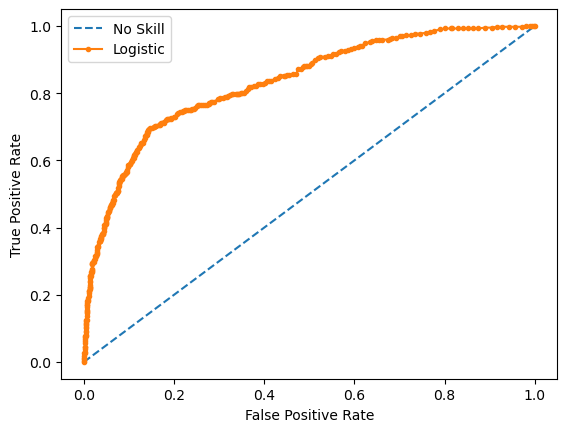

In [34]:
fpr, tpr, thresholds = roc_curve(y_test, probs)
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

The threshold (0.35) was found at which the F1 metric has grown to 0.6, as well as the ROC-AUC parameter is still much higher than that of the random model(0.5).

### Extra

Additionally, a random forest model was performed on combined training and validation samples.

In [35]:
X_train_valid = pd.concat([X_train_final, X_valid_final])
y_train_valid = pd.concat([y_train, y_valid])

In [36]:
best_model_f = None
best_result_f = 0.0
for est in range(10, 700, 10):
    model_forest = RandomForestClassifier(random_state=12345, n_estimators=est)
    model_forest.fit(X_train_valid, y_train_valid)
    result_forest = model_forest.score(X_train_valid, y_train_valid)
    if result_forest > best_result_f:
        best_result_f = result_forest
        best_model_f = model_forest

print("Accuracy (best model), valid sample:", best_result_f)
print(best_model_f)

Accuracy (best model), valid sample: 1.0
RandomForestClassifier(n_estimators=70, random_state=12345)


Data balancing:

In [37]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train_valid.values == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train_valid.values == 0)))

Before OverSampling, counts of label '1': 1644
Before OverSampling, counts of label '0': 6356 



In [38]:
X_train_valid_final_s=np.array(X_train_valid)
X_train_valid_SMOTE, y_train_valid_SMOTE = SMOTE.fit_resample(X_train_valid_final_s, y_train_valid)

print("After OverSampling, counts of label '1': {}".format(sum(y_train_valid_SMOTE.values == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_valid_SMOTE.values == 0)))

After OverSampling, counts of label '1': 6356
After OverSampling, counts of label '0': 6356


In [39]:
model_rf2 = RandomForestClassifier(random_state=12345, n_estimators = 70)
model_rf2.fit(X_train_valid_SMOTE, y_train_valid_SMOTE)
predict_rf2 = model_rf2.predict(X_test_final)

probabilities_rf2 = model_rf2.predict_proba(X_test_final)
probs_rf2 = probabilities_rf2[:, 1]

roc_auc_rf2 = roc_auc_score(y_test, probs_rf2)

print("Recall:",recall_score(y_test, predict_rf2))
print("Precision:", precision_score(y_test, predict_rf2))
print('F1:', f1_score(y_test, predict_rf2))
print('ROC_AUC:', roc_auc_rf2)

Recall: 0.5139949109414759
Precision: 0.6412698412698413
F1: 0.5706214689265539
ROC_AUC: 0.8354764698337901


/Users/aasheremeeva/anaconda3/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/aasheremeeva/anaconda3/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


When testing a random forest model on a combined test and validation sample, as a result, the F1 value is still slightly below the threshold (0.57 vs. 0.59). There is potential for improving the model.

 # Conclusion

Before predicting the target variable, a number of steps were carried out to obtain the final result:
- data preprocession (got rid of unnecessary variables, converted categorical ones, filled in the gaps, standardized);
- several types of models were studied, the best of which turned out to be a random forest model;
- considered data balancing by different methods
- random forest model was tested on balanced data and the highest values of key parameters were obtained.

As a result, using a random forest model with balanced data with the SMOTE method, a sufficient level of the F1 metric and the AUC-ROC parameter were achieved in order to use the model to predict customer churn. At the same time, there is a potential for improving the model, since with deeper testing (training the model on combined validation and test samples), key metrics do not show the highest indicators.